In [1]:
import sys
sys.path.append('../')

from src import *
import numpy as np

## Preparing data

In [2]:
df = load_data('../data/processed/processed-googl-stock.csv')

Data loaded successfully.


In [3]:
df = data_normalize(df, method='minmax')

Data normalized successfully.


In [4]:
X, y = create_dataset(df, look_back=10)

Dataset created successfully.


In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, shuffle=False)

Data split successfully.


In [7]:
print('Train data shape:', X_train.shape, y_train.shape)
print('Test data shape:', X_test.shape, y_test.shape)

Train data shape: (2407, 10, 5) (2407,)
Test data shape: (602, 10, 5) (602,)


In [8]:
# Predictions to plot
predictions = []

## 15 Units GRU Model

In [9]:
gru_15 = build_rnn_gru((X.shape[1], X.shape[2]), 1, double_gru=False, num_units=15)

C:\Users\ericf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 15)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,006 (3.93 KB)

 Trainable params: 1,006 (3.93 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = gru_15.fit(X_train, 
                  y_train,
                  shuffle=False, 
                  epochs=100, 
                  batch_size=32, 
                  validation_split=0.2, 
                  verbose=0)

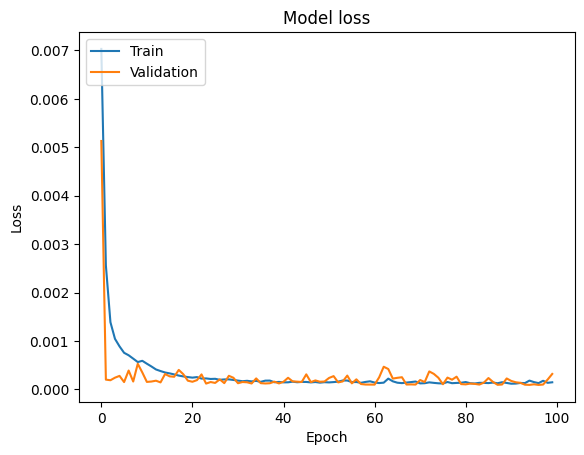

In [11]:
plot_loss(history)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


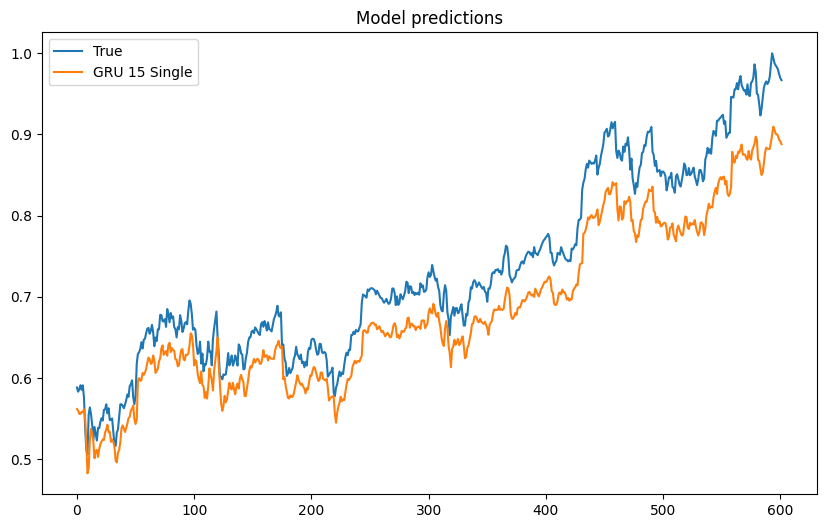

In [12]:
y_pred_15 = gru_15.predict(X_test)
predictions.append((y_pred_15, 'GRU 15 Single'))
plot_predictions(y_test,[(y_pred_15, 'GRU 15 Single')])

## 50 Unit GRU Model

In [13]:
gru_50 = build_rnn_gru((X.shape[1], X.shape[2]), 1, num_units=50)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50)             │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,601 (33.60 KB)

 Trainable params: 8,601 (33.60 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = gru_50.fit(X_train,
                  y_train,
                  shuffle=False,
                  epochs=100,
                  batch_size=32,
                  validation_split=0.2,
                  verbose=0)

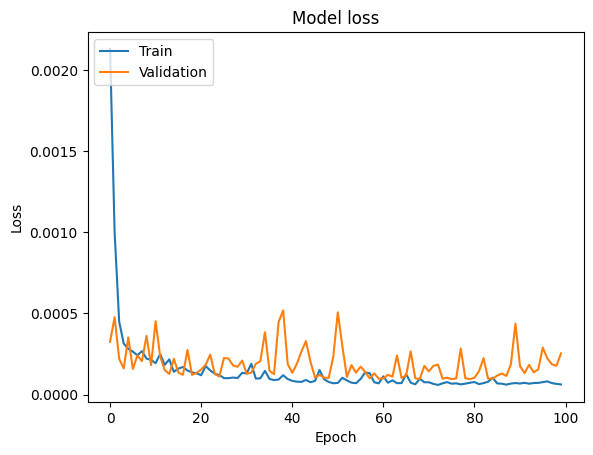

In [15]:
plot_loss(history)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


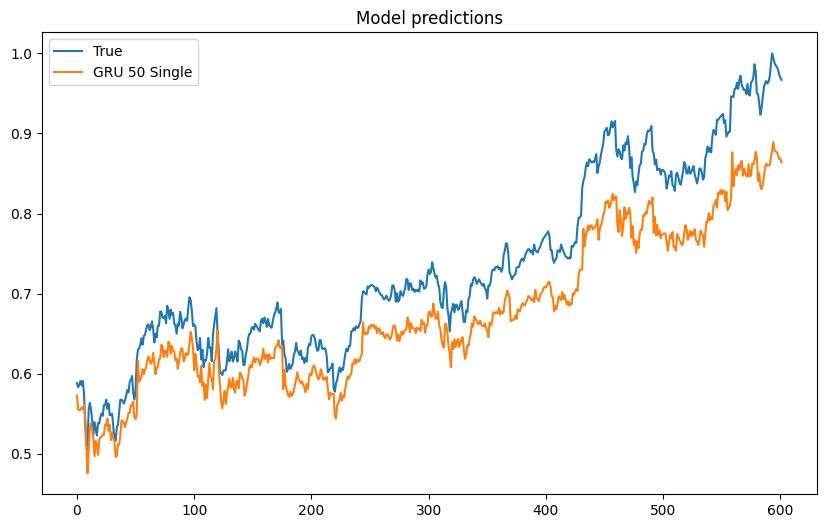

In [16]:
y_pred_50 = gru_50.predict(X_test)
predictions.append((y_pred_50, 'GRU 50 Single'))
plot_predictions(y_test, [(y_pred_50, 'GRU 50 Single')])

## 15 Units Double GRU Layer Model 

In [17]:
gru_15_double = build_rnn_gru((X.shape[1], X.shape[2]), 1, double_gru=True, num_units=15)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 15)         │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 15)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 15)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,446 (9.55 KB)

 Trainable params: 2,446 (9.55 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = gru_15_double.fit(X_train,
                            y_train,
                            shuffle=False,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=0)

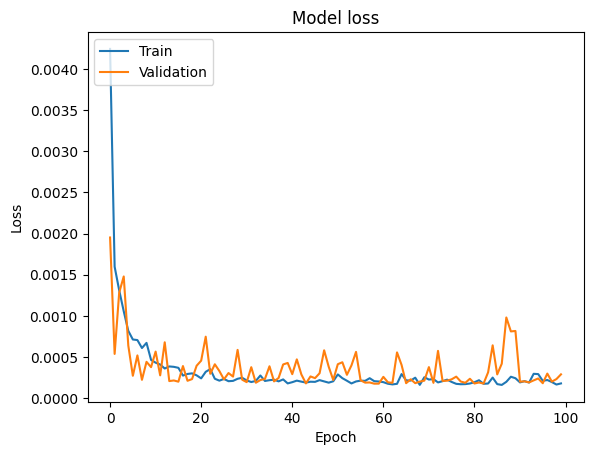

In [19]:
plot_loss(history)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


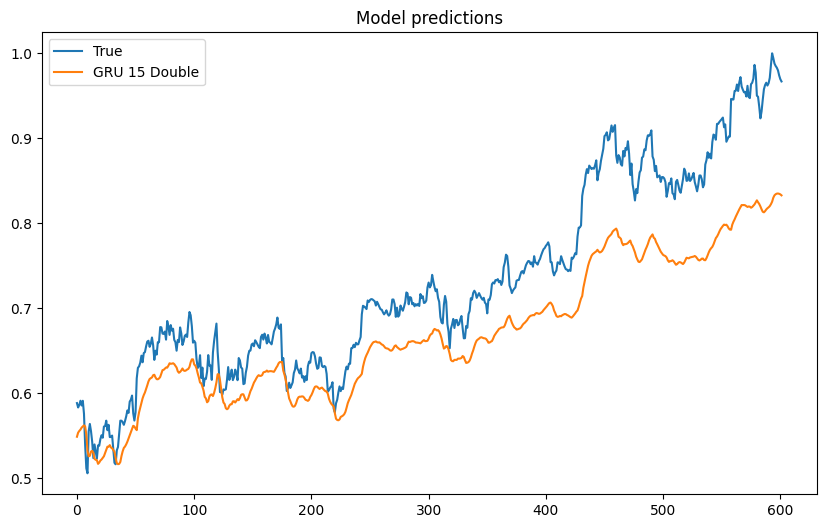

In [20]:
y_pred_15_double = gru_15_double.predict(X_test)
predictions.append((y_pred_15_double, 'GRU 15 Double'))
plot_predictions(y_test, [(y_pred_15_double, 'GRU 15 Double')])

## 50 Units Double GRU Layer Model

In [22]:
gru_50_double = build_rnn_gru((X.shape[1], X.shape[2]), 1, double_gru=True, num_units=50)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,901 (93.36 KB)

 Trainable params: 23,901 (93.36 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = gru_50_double.fit(X_train,
                            y_train,
                            shuffle=False,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=0)

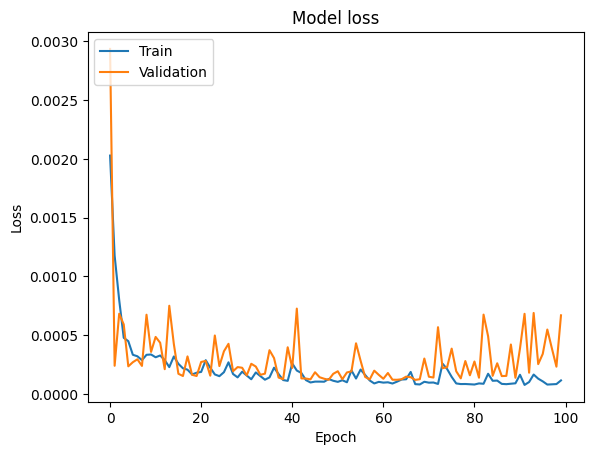

In [24]:
plot_loss(history)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


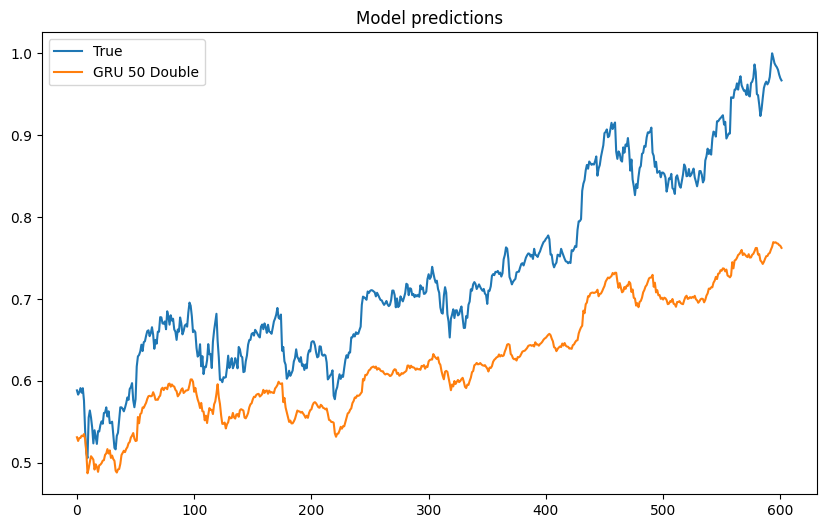

In [25]:
y_pred_50_double = gru_50_double.predict(X_test)
predictions.append((y_pred_50_double, 'GRU 50 Double'))
plot_predictions(y_test, [(y_pred_50_double, 'GRU 50 Double')])

## Comparing

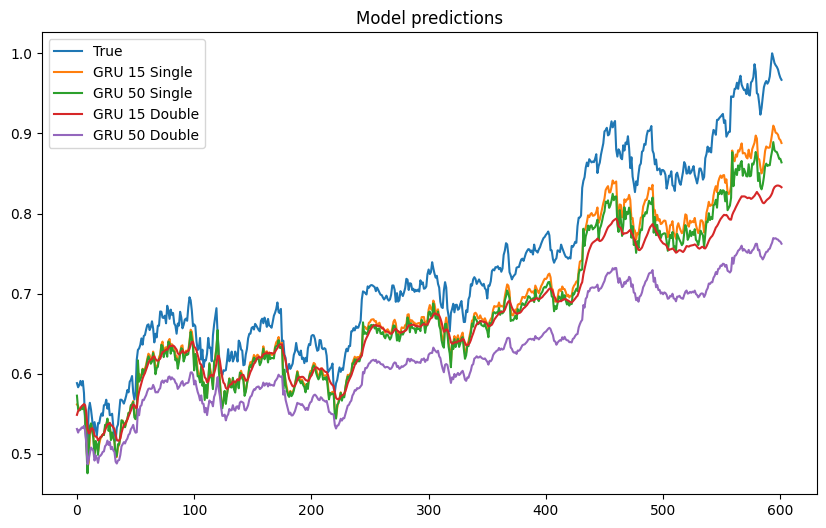

In [26]:
plot_predictions(y_test, predictions=predictions)